In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('olympics2.csv')

#noc = pd.read_csv('Summer Olympic medallists 1896 to 2008 - IOC COUNTRY CODES.csv')



# Nombre de los atletas de la edicion 1992 con medalla de oro.

data[ (data.Medal == 'Gold') & (data.Edition == 1992) ]



,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
19598,Barcelona,1992,Aquatics,Diving,"SUN, Shuwei",CHN,Men,10m platform,M,Gold
19601,Barcelona,1992,Aquatics,Diving,"FU, Mingxia",CHN,Women,10m platform,W,Gold
19604,Barcelona,1992,Aquatics,Diving,"LENZI, Mark Edward",USA,Men,3m springboard,M,Gold
19607,Barcelona,1992,Aquatics,Diving,"GAO, Min",CHN,Women,3m springboard,W,Gold
19610,Barcelona,1992,Aquatics,Swimming,"TEWKSBURY, Mark",CAN,Men,100m backstroke,M,Gold
...,...,...,...,...,...,...,...,...,...,...
21288,Barcelona,1992,Wrestling,Wrestling Gre-R,"REPKA, Attila",HUN,Men,62 - 68kg (lightweight),M,Gold
21291,Barcelona,1992,Wrestling,Wrestling Gre-R,"ISKANDARIAN, Mnatsakan",EUN,Men,68 - 74kg (welterweight),M,Gold
21294,Barcelona,1992,Wrestling,Wrestling Gre-R,"FARKAS, Peter",HUN,Men,74 - 82kg (middleweight),M,Gold
21297,Barcelona,1992,Wrestling,Wrestling Gre-R,"BULLMANN, Maik",GER,Men,82 - 90kg (light-heavyweight),M,Gold


In [15]:
# Ciudad sede Olimpiadas 2004

data['City'][ (data.Edition == 2004) ].unique()

array(['Athens'], dtype=object)

In [16]:
# Las mujeres que obtuvieron bronce en 2008

data['Athlete'][ (data.Medal == 'Bronze') & (data.Gender == 'Women') & (data.Edition == 2008) ]

27177               WANG, Xin
27183              WU, Minxia
27192         ESPINOSA, Paola
27193          ORTIZ, Tatiana
27204          FISCHER, Heike
                 ...         
29154          VERBEEK, Tonya
29161           MILLER, Randi
29162       SHALYGINA, Yelena
29169        HAMAGUCHI, Kyoko
29170    WIESZCZEK, Agnieszka
Name: Athlete, Length: 319, dtype: object

<Axes: xlabel='Medal', ylabel='count'>

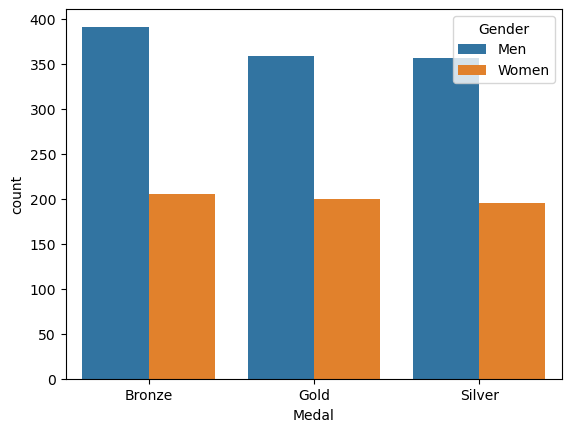

In [28]:
# Realizar gráfica de pastel con los hombres y mujeres que ganaron en 1992, ordenado por tipo de medalla

winners92 = data[ (data.Edition == 1992) ]

sns.countplot(x='Medal',data=winners92,hue='Gender')

In [23]:
# Realizar una consulta, agrupados por país, género y medalla

data.groupby(['NOC','Gender','Medal']).agg(['count'])

City Edition Sport Discipline Athlete Event Event_gender
                  count   count count      count   count count        count
NOC Gender Medal                                                           
AFG Men    Bronze     1       1     1          1       1     1            1
AHO Men    Silver     1       1     1          1       1     1            1
ALG Men    Bronze     7       7     7          7       7     7            7
           Gold       2       2     2          2       2     2            2
           Silver     2       2     2          2       2     2            2
...                 ...     ...   ...        ...     ...   ...          ...
ZZX Men    Bronze     8       8     8          8       8     8            8
           Gold      23      23    23         23      23    23           23
           Silver    14      14    14         14      14    14           14
    Women  Bronze     2       2     2          2       2     2            2
           Silver     1       1     1          1       1     1            1

[533 rows x 7 columns]

<Axes: xlabel='NOC', ylabel='count'>

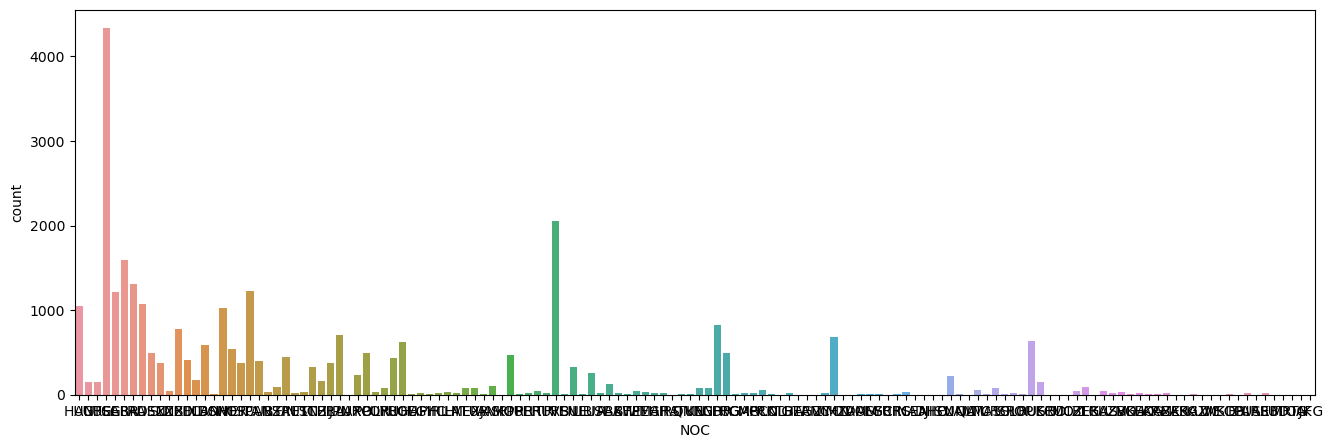

In [37]:
#Realizar una gráfica donde se observe la cantidad de medallas por país

m=data
m.Medal.value_counts()
plt.figure(figsize=(16,5))
sns.countplot(data=m,x='NOC',orient='v')

In [30]:
g = data.groupby(['NOC','Medal']).size().unstack('Medal',fill_value=0)

g = g.sort_values(['Gold','Silver','Bronze'],ascending=False)[['Gold','Silver','Bronze']]

g

Medal,Gold,Silver,Bronze
NOC,,,
USA,2088,1195,1052
URS,838,627,584
GBR,498,591,505
ITA,460,394,374
GER,407,350,454
...,...,...,...
KUW,0,0,1
MKD,0,0,1
MRI,0,0,1


<Axes: xlabel='Medal', ylabel='NOC'>

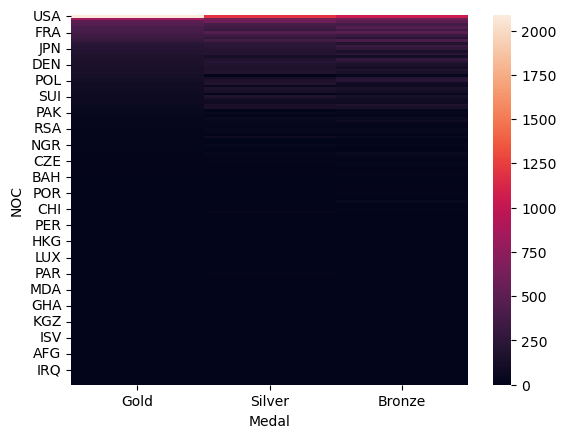

In [32]:
sns.heatmap(g)

In [33]:
g2 = g.transpose()
g2

NOC,USA,URS,GBR,ITA,GER,HUN,FRA,SWE,GDR,AUS,...,BER,DJI,ERI,GUY,IRQ,KUW,MKD,MRI,NIG,TOG
Medal,,,,,,,,,,,,,,,,,,,,,
Gold,2088,838,498,460,407,400,378,347,329,293,...,0,0,0,0,0,0,0,0,0,0
Silver,1195,627,591,394,350,308,461,349,271,369,...,0,0,0,0,0,0,0,0,0,0
Bronze,1052,584,505,374,454,345,475,325,225,413,...,1,1,1,1,1,1,1,1,1,1


<Axes: xlabel='NOC', ylabel='Medal'>

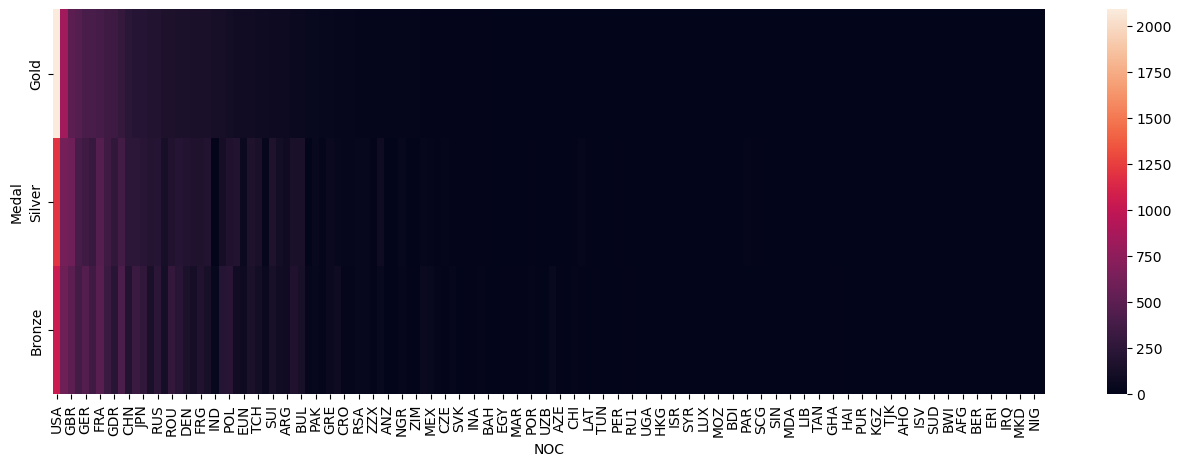

In [34]:
plt.figure(figsize=(16,5))
sns.heatmap(g2)